In [1]:
# !pip install sentence-transformers

In [2]:
# !pip install hdbscan


In [3]:
# !pip install umap-learn

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.base import BaseEstimator, TransformerMixin
from sentence_transformers import SentenceTransformer
import hdbscan
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\MMA\Winter 2025\INSY 695 - Production\Group Project\final_Clean_flattened_cleaned_Official_V2.csv")

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,job_id,industry_id,salary_id,currency_x,compensation_type_x,company_name,title,description_x,location,company_id,views,formatted_work_type,applies,remote_allowed,job_posting_url,application_type,formatted_experience_level,sponsored,work_type,compensation_type_y,normalized_salary,employee_count,follower_count,description_y,company_size,state,country,city,zip_code_y,address,url,industry,max_salary_in_usd,min_salary_in_usd,max_hourly_salary_in_usd,min_hourly_salary_in_usd,ListedDate,ListedTime,ExpieryDate,ExpieryTime,401(k),Child care support,Commuter benefits,Dental insurance,Disability insurance,Medical insurance,Paid maternity leave,Paid paternity leave,Pension plan,Student loan assistance,Tuition assistance,Vision insurance,CompApplication,full_description,cleaned_full_description,extracted_skills,combined_features,TitleClean
0,3884431523,56,3.0,USD,BASE_SALARY,Energy Fuels Inc,Mine Foreman,GENERAL PURPOSE:Under the general direction of...,Greater Flagstaff Area,947812.0,4.0,Full-time,0.0,0.0,https://www.linkedin.com/jobs/view/3884431523/...,ComplexOnsiteApply,Mid-Senior level,0.0,FULL_TIME,BASE_SALARY,110000.0,102.000000,2831.000000,Energy Fuels (NYSE MKT UUUU | TSX:EFR) is a le...,2.0,Colorado,US,Lakewood,80228,225 Union Blvd.,https://www.linkedin.com/company/energy-fuels-...,Mining,120000.0,100000.0,57.692308,48.076923,2024-04-05,19:35:01,2024-05-05,19:35:01,1,0,0,1,0,1,0,0,0,0,0,1,0,GENERAL PURPOSE:Under the general direction of...,purpose direction superintendent position vers...,"['education', 'equipment', 'state', 'developme...",[0. 0.02371779 0.06454172 0.61997699 0...,project manager
1,3884911725,12,4.0,USD,BASE_SALARY,"Direct Sales Recruiting, LLC",Territory Sales - Medical Sales - Long Island,Territory Sales Manager - Medical Sales\nMy cl...,"Hempstead, NY",766849.0,4.0,Full-time,1.0,0.0,https://www.linkedin.com/jobs/view/3884911725/...,SimpleOnsiteApply,Associate,0.0,FULL_TIME,BASE_SALARY,105000.0,24.500000,68099.500000,"Direct Sales Recruiting, LLC, where we bring m...",1.0,NJ,US,Basking Ridge,07920,0,https://www.linkedin.com/company/direct-sales-...,Staffing and Recruiting,200000.0,10000.0,96.153846,4.807692,2024-04-05,19:36:27,2024-05-05,19:36:26,0,0,0,0,0,0,0,0,0,0,0,0,0,Territory Sales Manager - Medical Sales\nMy cl...,territory sale manager sale client leader devi...,"['need', 'plan', 'account', 'growth', 'employe...",[0.04253479 0.06880609 0.09361883 0.62677572 0...,sales representative
2,3884911725,17,4.0,USD,BASE_SALARY,"Direct Sales Recruiting, LLC",Territory Sales - Medical Sales - Long Island,Territory Sales Manager - Medical Sales\nMy cl...,"Hempstead, NY",766849.0,4.0,Full-time,1.0,0.0,https://www.linkedin.com/jobs/view/3884911725/...,SimpleOnsiteApply,Associate,0.0,FULL_TIME,BASE_SALARY,105000.0,24.500000,68099.500000,"Direct Sales Recruiting, LLC, where we bring m...",1.0,NJ,US,Basking Ridge,07920,0,https://www.linkedin.com/company/direct-sales-...,Staffing and Recruiting,200000.0,10000.0,96.153846,4.807692,2024-04-05,19:36:27,2024-05-05,19:36:26,0,0,0,0,0,0,0,0,0,0,0,0,0,Territory Sales Manager - Medical Sales\nMy cl...,territory sale manager sale client leader devi...,"['need', 'plan', 'account', 'growth', 'employe...",[0.04253479 0.06880609 0.09361883 0.62677572 0...,sales representative
3,3884911725,15,4.0,USD,BASE_SALARY,"Direct Sales Recruiting, LLC",Territory Sales - Medical Sales - Long Island,Territory Sales Manager - Medical Sales\nMy cl...,"Hempstead, NY",766849.0,4.0,Full-time,1.0,0.0,https://www.linkedin.com/jobs/view/3884911725/...,SimpleOnsiteApply,Associate,0.0,FULL_TIME,BASE_SALARY,105000.0,24.500000,68099.500000,"Direct Sales Recruiting, LLC, where we bring m...",1.0,NJ,US,Basking Ridge,07920,0,https://www.linkedin.com/company/direct-sales-...,Staffing and Recruiting,200000.0,10000.0,96.153846,4.807692,2024-04-05,19:36:27,2024-05-05,19:36:26,0,0,0,0,0,0,0,0,0,0,0,0,0,Territory Sales Manager - Medical Sales\nMy cl...,territory sale manager sale client leader devi...,"['need', 'pla

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39958 entries, 0 to 39957
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      39958 non-null  int64  
 1   industry_id                 39958 non-null  int64  
 2   salary_id                   39958 non-null  float64
 3   currency_x                  39958 non-null  object 
 4   compensation_type_x         39958 non-null  object 
 5   company_name                39958 non-null  object 
 6   title                       39958 non-null  object 
 7   description_x               39958 non-null  object 
 8   location                    39958 non-null  object 
 9   company_id                  39958 non-null  float64
 10  views                       39958 non-null  float64
 11  formatted_work_type         39958 non-null  object 
 12  applies                     39958 non-null  float64
 13  remote_allowed              399

In [6]:
unique_values = df.nunique()
print(unique_values)

job_id                        29040
industry_id                     378
salary_id                     29040
currency_x                        5
compensation_type_x               1
company_name                   9062
title                         20084
description_x                 27567
location                       3750
company_id                     9070
views                           481
formatted_work_type               7
applies                         201
remote_allowed                    2
job_posting_url               29040
application_type                  4
formatted_experience_level        7
sponsored                         1
work_type                         7
compensation_type_y               1
normalized_salary              6398
employee_count                 3850
follower_count                 7729
description_y                  9067
company_size                      8
state                           394
country                          42
city                        

In [7]:
df.columns.tolist()

['job_id',
 'industry_id',
 'salary_id',
 'currency_x',
 'compensation_type_x',
 'company_name',
 'title',
 'description_x',
 'location',
 'company_id',
 'views',
 'formatted_work_type',
 'applies',
 'remote_allowed',
 'job_posting_url',
 'application_type',
 'formatted_experience_level',
 'sponsored',
 'work_type',
 'compensation_type_y',
 'normalized_salary',
 'employee_count',
 'follower_count',
 'description_y',
 'company_size',
 'state',
 'country',
 'city',
 'zip_code_y',
 'address',
 'url',
 'industry',
 'max_salary_in_usd',
 'min_salary_in_usd',
 'max_hourly_salary_in_usd',
 'min_hourly_salary_in_usd',
 'ListedDate',
 'ListedTime',
 'ExpieryDate',
 'ExpieryTime',
 '401(k)',
 'Child care support',
 'Commuter benefits',
 'Dental insurance',
 'Disability insurance',
 'Medical insurance',
 'Paid maternity leave',
 'Paid paternity leave',
 'Pension plan',
 'Student loan assistance',
 'Tuition assistance',
 'Vision insurance',
 'CompApplication',
 'full_description',
 'cleaned_full_d

In [8]:
df['country'].value_counts()

country
US    35991
GB     1722
0       608
CA      327
FR      160
CH      156
IN      134
DE      134
OO      102
NL       97
SE       68
JP       64
IE       63
NO       47
DK       41
AU       35
SG       27
CN       26
BE       24
IL       21
IT       18
MX       12
ES       10
HK        9
BM        7
TW        7
LU        7
ZA        6
AE        6
AT        5
FI        5
MT        4
PA        3
NZ        2
HU        2
PR        2
BR        1
IS        1
KR        1
LB        1
KY        1
PK        1
Name: count, dtype: int64

# Cleaning pipeline for SVM and HDBSCAN

In [9]:
import pandas as pd

def filter_us_jobs(df):
    """Keeps only job postings from the US."""
    return df[df['country'] == 'US']

def filter_fulltime_jobs(df):
    """Keeps only job postings from the US."""
    return df[df['formatted_work_type'] == 'Full-time']

def extract_job_city(df):
    """Extracts the job city from the 'location' column."""
    df['job_city'] = df['location'].apply(lambda x: x.split(',')[0].strip() if pd.notnull(x) and ',' in x else x)
    return df

def standardize_city_names(df):
    """Standardizes city names to remove duplicates and inconsistencies."""
    city_mappings = {
        "New York City Metropolitan Area": "New York",
        "San Francisco Bay Area": "San Francisco",
        "Los Angeles Metropolitan Area": "Los Angeles",
        "Brooklyn": "New York",
        "Dallas-Fort Worth Metroplex": "Dallas",
        "United States": None,  # Remove rows where city is just "United States"
        "California": None,  # Remove ambiguous state-level entries
    }
    
    df['job_city'] = df['job_city'].replace(city_mappings)
    
    # Drop rows where 'job_city' is now NaN (after replacements)
    df = df.dropna(subset=['job_city'])
    
    return df

def filter_cities_by_postings(df, min_postings=100):
    """Keeps only cities with more than `min_postings` job postings."""
    city_counts = df['job_city'].value_counts()
    valid_cities = city_counts[city_counts > min_postings].index
    return df[df['job_city'].isin(valid_cities)]

def save_data(df, output_filepath):
    """Saves the cleaned dataset to a CSV file."""
    df.to_csv(output_filepath, index=False)

def clean_job_postings_pipeline(df, output_filepath):
    """Full pipeline to clean job postings data."""
    # Cleaning steps
    df = filter_us_jobs(df)
    df = filter_fulltime_jobs(df)
    df = extract_job_city(df)
    df = standardize_city_names(df)
    df = filter_cities_by_postings(df, min_postings=100)

    # Saving cleaned data
    save_data(df, output_filepath)

    return df  # Returning the cleaned dataframe for further use

# Example usage
# Assuming `df` is already loaded
cleaned_df = clean_job_postings_pipeline(df, "cleaned_dataset.csv")

# Display the first few rows
print(cleaned_df.head())


        job_id  industry_id  salary_id currency_x compensation_type_x  \
22  3884434034           48       21.0        USD         BASE_SALARY   
23  3884434034           44       21.0        USD         BASE_SALARY   
35  3887472403          106       31.0        USD         BASE_SALARY   
36  3887472403           44       31.0        USD         BASE_SALARY   
37  3887472403          129       31.0        USD         BASE_SALARY   

                      company_name                                   title  \
22  Wesbuilt Construction Managers               Assistant Project Manager   
23  Wesbuilt Construction Managers               Assistant Project Manager   
35            Coda Search│Staffing  Private Equity Investments (Associate)   
36            Coda Search│Staffing  Private Equity Investments (Associate)   
37            Coda Search│Staffing  Private Equity Investments (Associate)   

                                        description_x  \
22  About Us:Wesbuilt Construction 

In [10]:
cleaned_df['job_city'].value_counts()

job_city
New York         2261
Los Angeles       663
San Francisco     528
Dallas            398
Seattle           389
Denver            376
Chicago           374
San Diego         317
Atlanta           300
Boston            275
Houston           266
San Jose          264
Washington        261
Austin            260
Charlotte         208
Phoenix           201
Sacramento        200
Irvine            182
Portland          175
Miami             159
St Louis          156
Philadelphia      154
Raleigh           143
Tampa             130
Minneapolis       130
Columbus          123
Rochester         110
Baltimore         109
Orlando           106
Indianapolis      104
Sunnyvale         103
San Antonio       103
Las Vegas         101
Name: count, dtype: int64

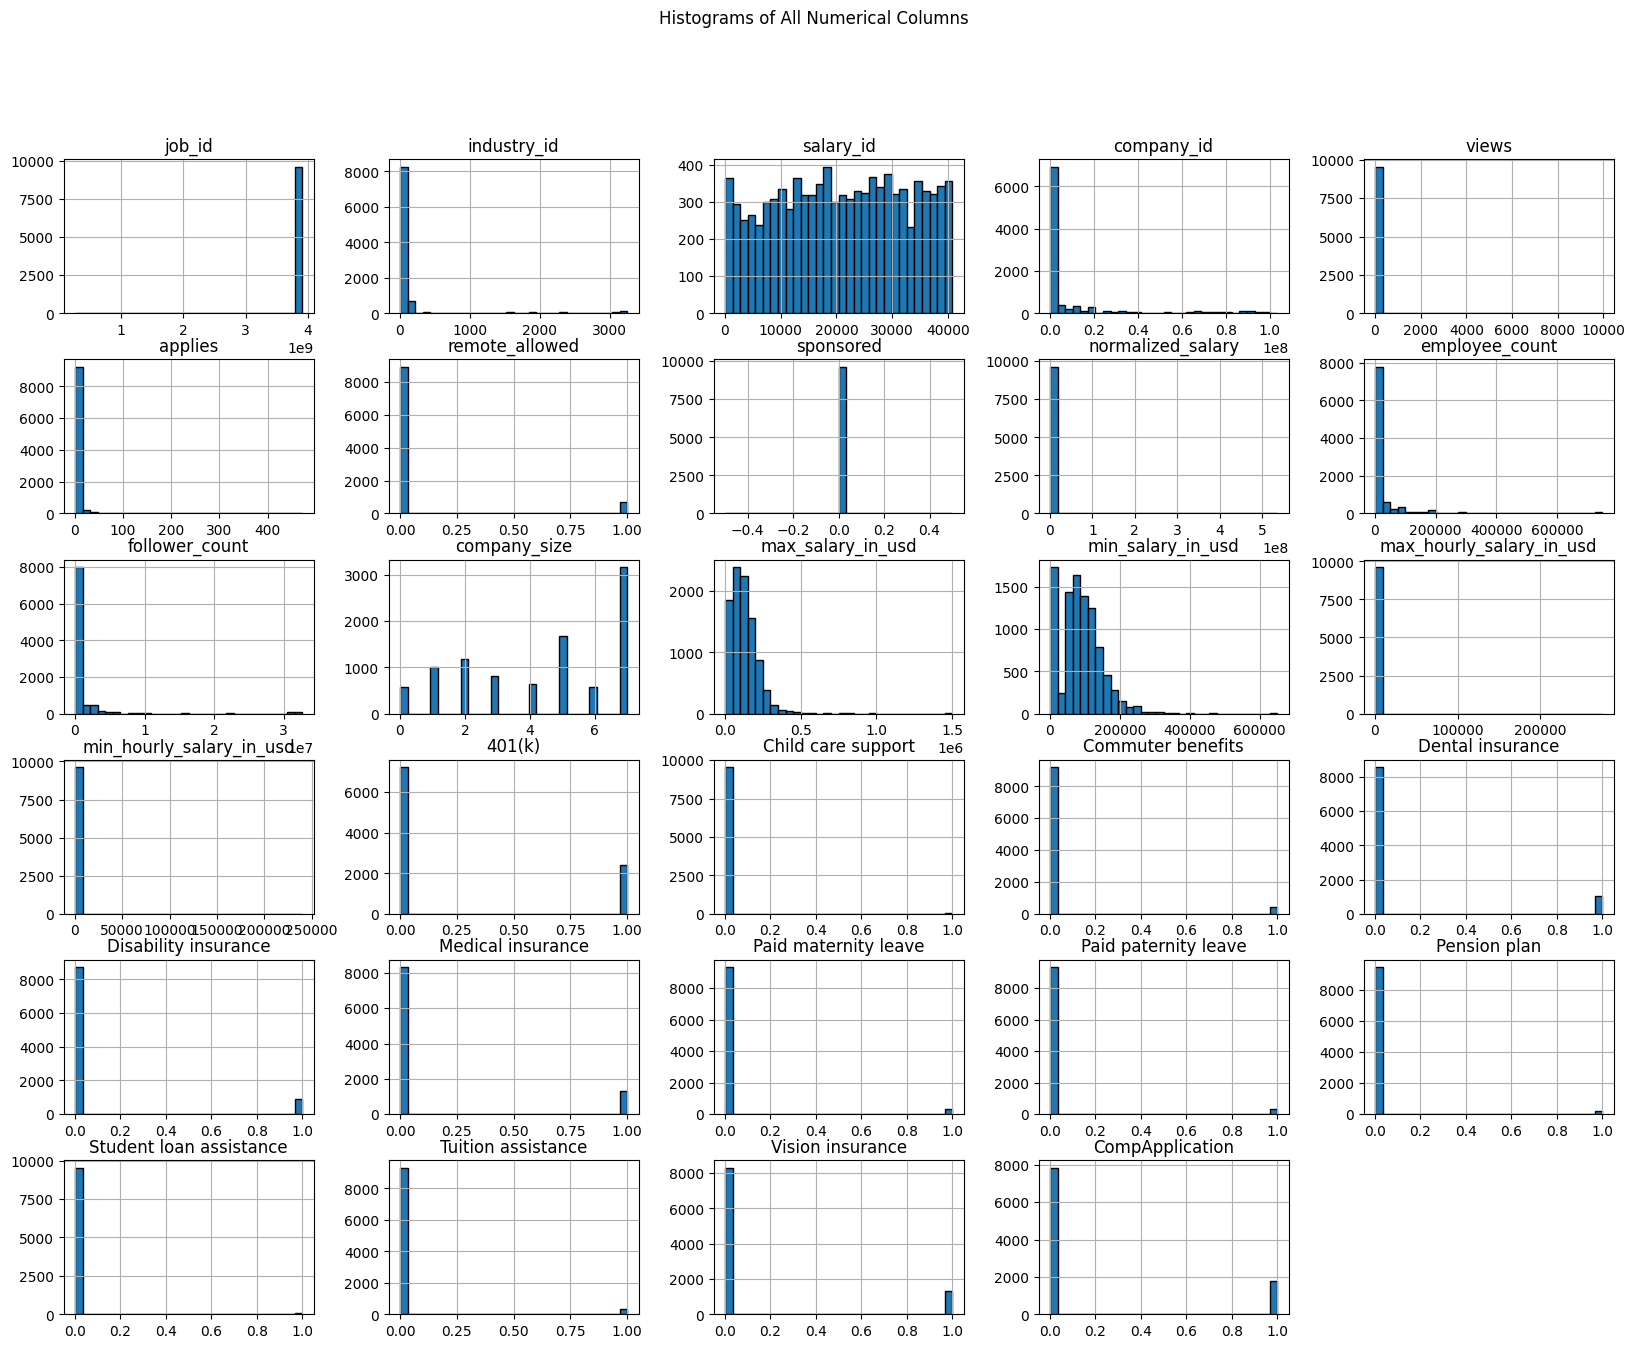

In [11]:
import matplotlib.pyplot as plt

# Plot histograms of all numerical columns
cleaned_df.hist(bins=30, figsize=(20, 15), edgecolor='black')
plt.suptitle('Histograms of All Numerical Columns')  # Add a title to the figure
plt.show()

In [12]:
cleaned_df.describe()

,job_id,industry_id,salary_id,company_id,views,applies,remote_allowed,sponsored,normalized_salary,employee_count,follower_count,company_size,max_salary_in_usd,min_salary_in_usd,max_hourly_salary_in_usd,min_hourly_salary_in_usd,401(k),Child care support,Commuter benefits,Dental insurance,Disability insurance,Medical insurance,Paid maternity leave,Paid paternity leave,Pension plan,Student loan assistance,Tuition assistance,Vision insurance,CompApplication
count,9.629000e+03,9629.000000,9629.000000,9.629000e+03,9629.000000,9629.000000,9629.000000,9629.0,9.629000e+03,9629.000000,9.629000e+03,9629.000000,9.629000e+03,9629.000000,9629.000000,9629.000000,9629.000000,9629.000000,9629.000000,9629.000000,9629.000000,9629.000000,9629.000000,9629.000000,9629.000000,9629.000000,9629.000000,9629.000000,9629.000000
mean,3.897712e+09,185.190570,20883.911725,1.074787e+07,24.772354,2.652093,0.075293,0.0,2.430178e+05,26886.423303,1.193997e+06,4.396511,1.251243e+05,87222.004514,132.108395,101.562579,0.249039,0.009139,0.044761,0.110292,0.094818,0.136567,0.031467,0.031987,0.017759,0.008101,0.031987,0.136151,0.184339
std,6.179625e+07,552.931357,11647.161457,2.362849e+07,216.625674,12.228780,0.263878,0.0,6.903326e+06,79749.562676,4.330887e+06,2.386043,1.005217e+05,61331.911038,3580.544111,3058.663319,0.432479,0.095166,0.206789,0.313269,0.292978,0.343407,0.174586,0.175974,0.132081,0.089642,0.175974,0.342967,0.387781
min,2.665669e+08,1.000000,21.000000,1.009000e+03,0.000000,0.000000,0.000000,0.0,2.000000e+01,0.000000,1.000000e+00,0.000000,7.250000e+00,7.250000,0.010096,0.008654,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.895521e+09,15.000000,11071.000000,9.561000e+03,3.000000,0.000000,0.000000,0.0,7.250000e+04,131.000000,1.510667e+04,2.000000,7.000000e+04,54000.000000,38.461538,29.541346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.902306e+09,44.000000,21040.000000,1.665870e+05,5.000000,0.000000,0.000000,0.0,1.050000e+05,1581.250000,7.921500e+04,5.000000,1.150000e+05,84000.000000,57.692308,42.307692,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.904718e+09,96.000000,30707.000000,5.102948e+06,12.000000,1.000000,0.000000,0.0,1.500000e+05,16177.333333,4.246760e+05,7.000000,1.750000e+05,120150.000000,84.134615,59.567308,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.906265e+09,3250.000000,40763.000000,1.034565e+08,9949.000000,472.000000,1.000000,0.0,5.356000e+08,748029.500000,3.266054e+07,7.000000,1.500000e+06,650000.000000,275000.000000,240000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
unique_values = cleaned_df.nunique()
print(unique_values)

job_id                        6938
industry_id                    283
salary_id                     6938
currency_x                       1
compensation_type_x              1
company_name                  2996
title                         5619
description_x                 6667
location                        71
company_id                    2996
views                          228
formatted_work_type              1
applies                         91
remote_allowed                   2
job_posting_url               6938
application_type                 3
formatted_experience_level       7
sponsored                        1
work_type                        1
compensation_type_y              1
normalized_salary             2212
employee_count                1824
follower_count                2901
description_y                 2995
company_size                     8
state                          133
country                          1
city                           607
zip_code_y          

# Full Preprocessing Pipeline

In [14]:
### Step 1: Define Column Groups

# Numerical features
numerical_cols = ['normalized_salary', 'views', 'applies', 'employee_count', 'follower_count']

# Binary predictors (Excluded from HDBSCAN)
binary_cols = ['remote_allowed', 'Child care support', 'Commuter benefits', 'Dental insurance',
               'Disability insurance', 'Medical insurance', 'Paid maternity leave', 
               'Paid paternity leave', 'Pension plan', 'Student loan assistance', 
               'Tuition assistance', 'Vision insurance', 'CompApplication']

# Low-cardinality categorical features (for One-Hot Encoding)
categorical_cols = ['formatted_work_type', 'formatted_experience_level', 'application_type', 'job_city', 'TitleClean', 'industry']



In [15]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureEngineering(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()

        # Ensure date columns are datetime
        X['ListedDate'] = pd.to_datetime(X['ListedDate'])
        X['ExpieryDate'] = pd.to_datetime(X['ExpieryDate'])

        # Days active (avoid division by zero)
        X['days_active'] = (X['ExpieryDate'] - X['ListedDate']).dt.days.replace(0, 1)

        # Derived engagement metrics
        X['views_per_day'] = X['views'] / X['days_active']
        X['applies_per_day'] = X['applies'] / X['days_active']

        # Salary difference percentage
        X['salary_diff_percentage'] = (X['max_salary_in_usd'] - X['min_salary_in_usd']) / X['min_salary_in_usd']
        X['salary_diff_percentage'].replace([np.inf, -np.inf], 0, inplace=True)  # Handle division errors

        # Apply log transformation to skewed numerical features
        log_transform_cols = ['views_per_day', 'applies_per_day', 'salary_diff_percentage'] + numerical_cols

        for col in log_transform_cols:
            if col in X.columns:
                X[col + '_log'] = np.log1p(X[col])  # log1p(x) = log(1 + x), avoids log(0) issue

        # Drop the original (non-log) numerical columns and EXCLUDE views_log, applies_log
        drop_cols = log_transform_cols + ['views_log', 'applies_log']
        X.drop(columns=drop_cols, errors='ignore', inplace=True)

        # Drop unnecessary columns
        extra_drop_cols = ['ListedDate', 'ExpieryDate', 'job_id', 'company_id', 'job_posting_url', 'address', 'url', 'zip_code_y']
        X.drop(columns=[col for col in extra_drop_cols if col in X.columns], errors='ignore', inplace=True)

        return X


In [16]:
# Apply Feature Engineering to get the transformed dataset
feature_engineering = FeatureEngineering()
cleaned_df = feature_engineering.transform(cleaned_df)

# Extract log-transformed numerical columns dynamically
log_numerical_cols = [col for col in cleaned_df.columns if col.endswith('_log') and col not in ['views_log', 'applies_log', 'views_per_day_log', 'applies_per_day_log']]

# 🚀 Step 1: Train-Test Split (Before Categorization)
X = cleaned_df.drop(columns=['views_per_day_log', 'applies_per_day_log'])  # Remove target column before split
y = cleaned_df['views_per_day_log']  # Raw log-transformed values as target (for now)

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute median from training data only
median_threshold = np.percentile(y_train, 50)  # 50th percentile (median)

# Apply the same categorization rules to BOTH train and test sets
def categorize_engagement(value):
    if value <= median_threshold:
        return 'low'
    else:
        return 'high'

# Convert train & test target using training-defined thresholds
y_train = y_train.apply(categorize_engagement)
y_test = y_test.apply(categorize_engagement)


C:\Users\melam\AppData\Local\Temp\ipykernel_12636\727462029.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['salary_diff_percentage'].replace([np.inf, -np.inf], 0, inplace=True)  # Handle division errors


In [17]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer


# StandardScaler for log-transformed numerical features
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Scale only log-transformed values
])

# One-Hot Encoding for low-cardinality categorical features
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])



# Combine all transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, log_numerical_cols),  # ✅ Uses extracted log-transformed numericals
        ('cat', cat_transformer, categorical_cols)
    ]
)



In [18]:
# Apply Preprocessing Pipeline to Train and Test Separately
X_train_transformed = preprocessor.fit_transform(X_train)  # Fit & transform on train data
X_test_transformed = preprocessor.transform(X_test)  # Only transform test data (NO FIT!)

# Extract dynamically generated feature names
categorical_feature_names = preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_cols)


# Generate correct column names dynamically
column_names = log_numerical_cols + \
               list(categorical_feature_names)

# Convert transformed arrays into DataFrames
X_train_transformed = pd.DataFrame(X_train_transformed, columns=column_names)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=column_names)

# Print final shape to confirm match
print(f"Training Set Shape: {X_train_transformed.shape}, Test Set Shape: {X_test_transformed.shape}")

Training Set Shape: (7703, 264), Test Set Shape: (1926, 264)


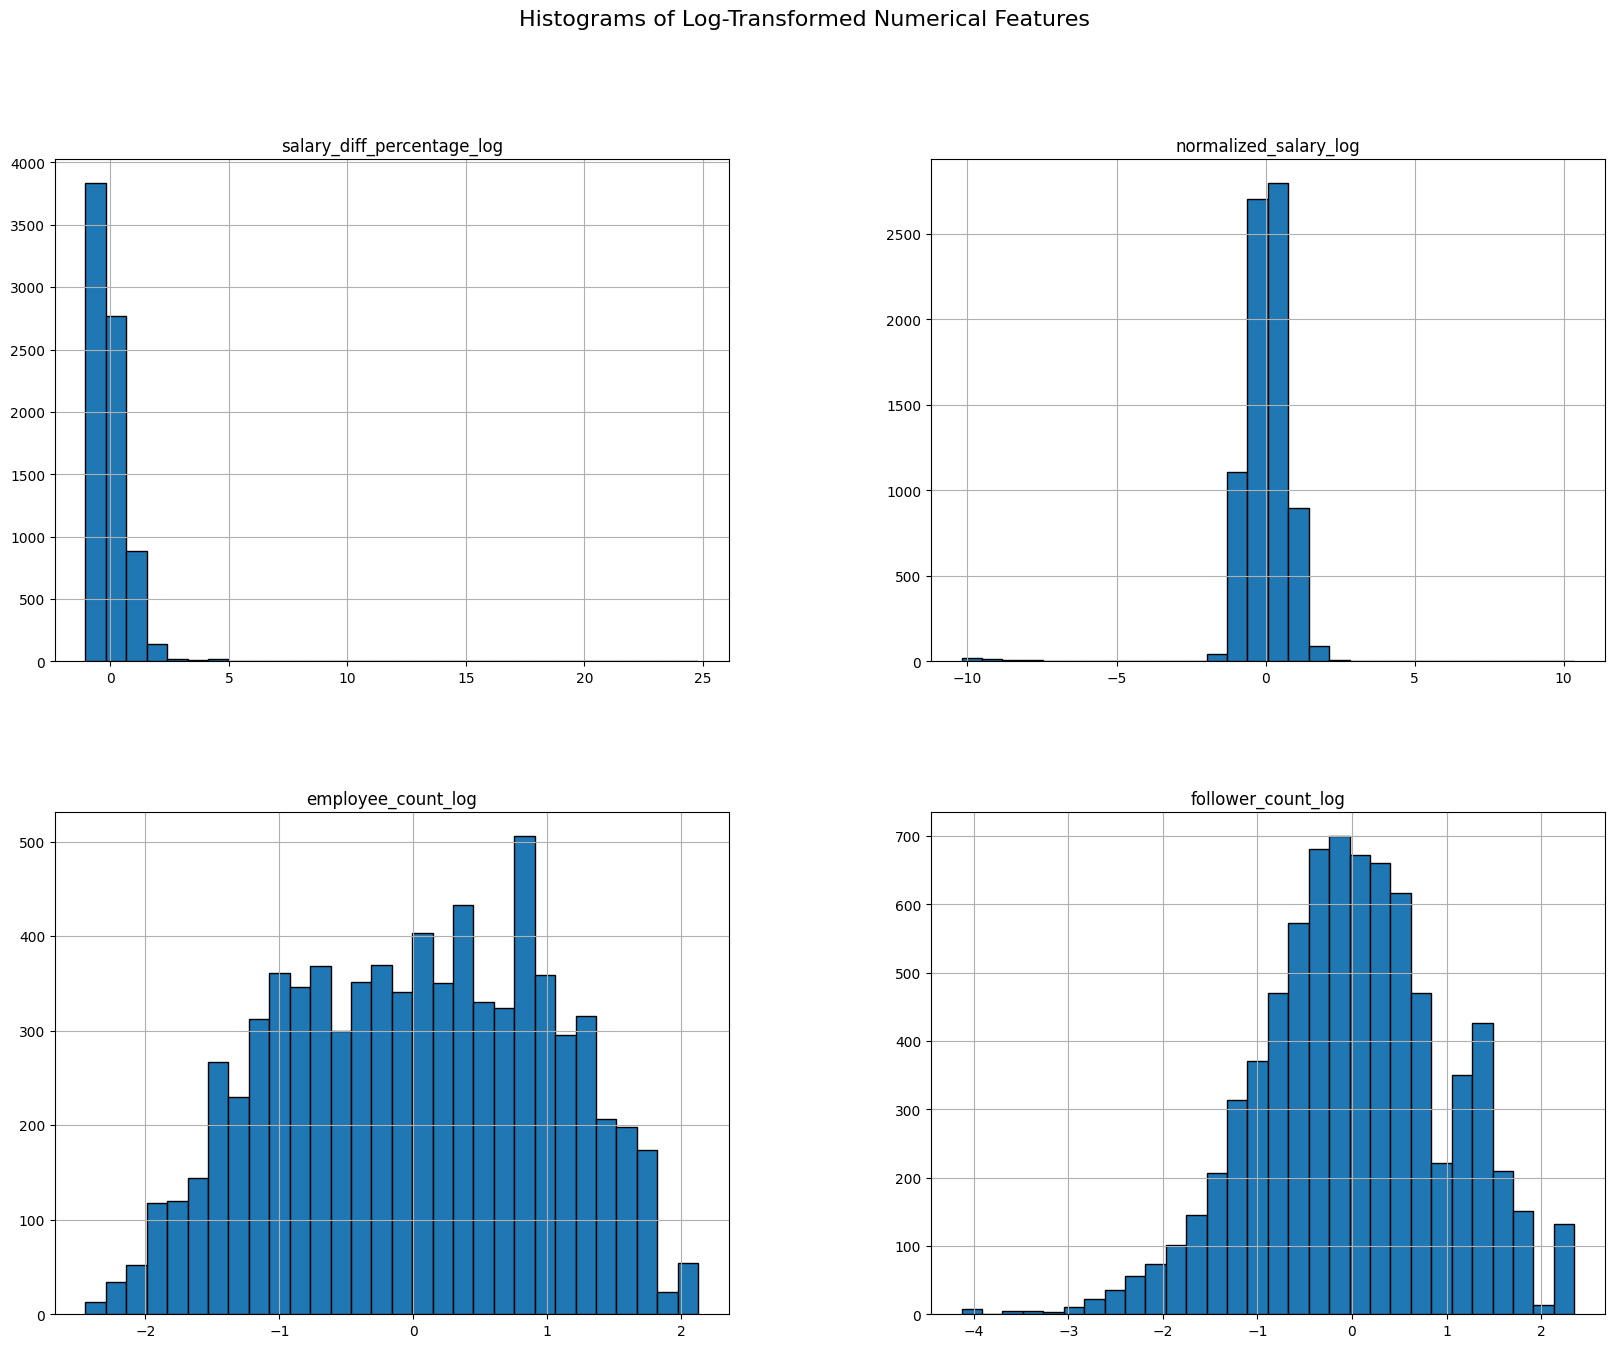

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms of log-transformed numerical columns
X_train_transformed[log_numerical_cols].hist(bins=30, figsize=(20, 15), edgecolor='black')
plt.suptitle('Histograms of Log-Transformed Numerical Features', fontsize=16)
plt.show()


## Random Forest

### SMOTE

In [20]:
from imblearn.over_sampling import SMOTE

# 🚀 Apply SMOTE to balance training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_transformed, y_train)


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 🚀 Initialize Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=200,  # Number of trees
    max_depth=None,  # Allow trees to fully grow
    min_samples_split=5,  # Minimum samples needed to split
    min_samples_leaf=2,  # Minimum samples per leaf
    class_weight='balanced',  # Handle class imbalance
    random_state=42,
    n_jobs=-1  # Use all processors for speed
)

# Train the model
rf_model.fit(X_train_balanced, y_train_balanced)
print("✅ Random Forest Training Complete!")


✅ Random Forest Training Complete!


In [22]:
# 🚀 Make predictions
y_pred_rf = rf_model.predict(X_test_transformed)

# Print Classification Report
print("📊 Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Print Accuracy Scorey
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"🔥 Random Forest Accuracy: {accuracy_rf:.4f}")


📊 Random Forest Classification Report:
              precision    recall  f1-score   support

        high       0.71      0.60      0.65       820
         low       0.74      0.82      0.78      1106

    accuracy                           0.73      1926
   macro avg       0.72      0.71      0.71      1926
weighted avg       0.73      0.73      0.72      1926

🔥 Random Forest Accuracy: 0.7269


In [23]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 500],  # More trees = better stability
    'max_depth': [None, 10, 20, 30],  # Limit tree depth
    'min_samples_split': [2, 5, 10],  # More conservative splits
    'min_samples_leaf': [1, 2, 5],  # Minimum data per leaf
}

# Run grid search
grid_search = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42),
                           param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_balanced, y_train_balanced)

print(f"🔥 Best RF Parameters: {grid_search.best_params_}")

# Train optimized RF model
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test_transformed)

# Evaluate
print("📊 Optimized RF Classification Report:")
print(classification_report(y_test, y_pred_best))


🔥 Best RF Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
📊 Optimized RF Classification Report:
              precision    recall  f1-score   support

        high       0.76      0.64      0.70       820
         low       0.76      0.85      0.81      1106

    accuracy                           0.76      1926
   macro avg       0.76      0.75      0.75      1926
weighted avg       0.76      0.76      0.76      1926



In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Manually define the Random Forest model with the best parameters
best_rf_manual = RandomForestClassifier(
    max_depth=None, 
    min_samples_leaf=1, 
    min_samples_split=2, 
    n_estimators=500, 
    class_weight='balanced', 
    random_state=42
)

# Train the model on the balanced training data
best_rf_manual.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred_manual = best_rf_manual.predict(X_test_transformed)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred_manual)
print(f"🔥 Optimized RF Accuracy: {accuracy:.4f}")

# Print classification report
print("📊 Optimized RF Classification Report:")
print(classification_report(y_test, y_pred_manual))


🔥 Optimized RF Accuracy: 0.7627
📊 Optimized RF Classification Report:
              precision    recall  f1-score   support

        high       0.76      0.64      0.70       820
         low       0.76      0.85      0.81      1106

    accuracy                           0.76      1926
   macro avg       0.76      0.75      0.75      1926
weighted avg       0.76      0.76      0.76      1926



### SMOTEEN SMOTETOMEK

In [ ]:
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 🚀 Apply SMOTEENN to balance training data
smoteenn = SMOTEENN(random_state=42)
X_train_smoteenn, y_train_smoteenn = smoteenn.fit_resample(X_train_transformed, y_train)

# 🚀 Apply SMOTETomek to balance training data
smotetomek = SMOTETomek(random_state=42)
X_train_smotetomek, y_train_smotetomek = smotetomek.fit_resample(X_train_transformed, y_train)

# Train optimized RandomForestClassifier with best parameters (from your previous grid search)
best_rf = RandomForestClassifier(
    max_depth=None, 
    min_samples_leaf=1, 
    min_samples_split=2, 
    n_estimators=500, 
    class_weight='balanced', 
    random_state=42
)

# 📈 Train with SMOTEENN balanced data
best_rf.fit(X_train_smoteenn, y_train_smoteenn)
y_pred_smoteenn = best_rf.predict(X_test_transformed)
print("📊 Optimized RF with SMOTEENN Classification Report:")
print(classification_report(y_test, y_pred_smoteenn))

# 📈 Train with SMOTETomek balanced data
best_rf.fit(X_train_smotetomek, y_train_smotetomek)
y_pred_smotetomek = best_rf.predict(X_test_transformed)
print("📊 Optimized RF with SMOTETomek Classification Report:")
print(classification_report(y_test, y_pred_smotetomek))


📊 Optimized RF with SMOTEENN Classification Report:
              precision    recall  f1-score   support

        high       0.52      0.77      0.62       820
         low       0.73      0.47      0.57      1106

    accuracy                           0.60      1926
   macro avg       0.63      0.62      0.60      1926
weighted avg       0.64      0.60      0.59      1926

📊 Optimized RF with SMOTETomek Classification Report:
              precision    recall  f1-score   support

        high       0.76      0.63      0.69       820
         low       0.76      0.85      0.80      1106

    accuracy                           0.76      1926
   macro avg       0.76      0.74      0.74      1926
weighted avg       0.76      0.76      0.75      1926



# SVM

In [33]:
from sklearn.svm import SVC

# Initialize SVM classifier with RBF kernel
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced', random_state=42, decision_function_shape='ovo')

from sklearn.metrics import classification_report, accuracy_score

# Retrain SVM with balanced data
svm_model.fit(X_train_balanced, y_train_balanced)

# 🚀 Make predictions using transformed test set
y_pred = svm_model.predict(X_test_transformed)

# Print Classification Report
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Print Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"🔥 SVM Accuracy: {accuracy:.4f}")

📊 Classification Report:
              precision    recall  f1-score   support

        high       0.56      0.63      0.59       820
         low       0.70      0.64      0.67      1106

    accuracy                           0.64      1926
   macro avg       0.63      0.63      0.63      1926
weighted avg       0.64      0.64      0.64      1926

🔥 SVM Accuracy: 0.6355


In [34]:
# 🚀 Train with polynomial kernel
svm_poly = SVC(kernel='poly', degree=3, C=1.0, class_weight='balanced', random_state=42)
svm_poly.fit(X_train_balanced, y_train_balanced)

from sklearn.metrics import classification_report, accuracy_score

# 🚀 Make predictions using transformed test set
y_pred = svm_poly.predict(X_test_transformed)

# Print Classification Report
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Print Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"🔥 SVM Accuracy: {accuracy:.4f}")

📊 Classification Report:
              precision    recall  f1-score   support

        high       0.58      0.65      0.61       820
         low       0.71      0.65      0.68      1106

    accuracy                           0.65      1926
   macro avg       0.65      0.65      0.65      1926
weighted avg       0.66      0.65      0.65      1926

🔥 SVM Accuracy: 0.6490


In [35]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# 🚀 Define the SVM with polynomial kernel
svm_poly = SVC(kernel='poly', degree=3, C=1.0, class_weight='balanced', random_state=42)

# 🚀 Define the Random Forest with the best hyperparameters
rf = RandomForestClassifier(
    max_depth=None, 
    min_samples_leaf=1, 
    min_samples_split=2, 
    n_estimators=500, 
    class_weight='balanced', 
    random_state=42
)

# 🚀 Combine SVM with Random Forest in a Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('svm', svm_poly), ('rf', rf)],
    voting='hard'  # Hard voting: predicts the class that gets the most votes
)

# 🚀 Fit the ensemble model on the balanced training data
voting_clf.fit(X_train_balanced, y_train_balanced)

# 🚀 Make predictions using the transformed test set
y_pred = voting_clf.predict(X_test_transformed)

# Print Classification Report
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Print Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"🔥 Voting Classifier Accuracy: {accuracy:.4f}")


📊 Classification Report:
              precision    recall  f1-score   support

        high       0.60      0.76      0.67       820
         low       0.78      0.62      0.69      1106

    accuracy                           0.68      1926
   macro avg       0.69      0.69      0.68      1926
weighted avg       0.70      0.68      0.68      1926

🔥 Voting Classifier Accuracy: 0.6807


# Ensemble

In [38]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# 🚀 Define the SVM with polynomial kernel and enable probability estimation
svm_poly = SVC(kernel='poly', degree=3, C=1.0, class_weight='balanced', random_state=42, probability=True)

# 🚀 Define the Random Forest with the best hyperparameters
rf = RandomForestClassifier(
    max_depth=None, 
    min_samples_leaf=1, 
    min_samples_split=2, 
    n_estimators=500, 
    class_weight='balanced', 
    random_state=42
)

# 🚀 Combine SVM with Random Forest in a Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('svm', svm_poly), ('rf', rf)],
    voting='soft'  # Soft voting: uses predicted class probabilities
)

# 🚀 Fit the ensemble model on the balanced training data
voting_clf.fit(X_train_balanced, y_train_balanced)

# 🚀 Make predictions using the transformed test set
y_pred = voting_clf.predict(X_test_transformed)

# Print Classification Report
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Print Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"🔥 Voting Classifier Accuracy: {accuracy:.4f}")


📊 Classification Report:
              precision    recall  f1-score   support

        high       0.74      0.66      0.70       820
         low       0.77      0.83      0.80      1106

    accuracy                           0.76      1926
   macro avg       0.75      0.74      0.75      1926
weighted avg       0.76      0.76      0.75      1926

🔥 Voting Classifier Accuracy: 0.7565


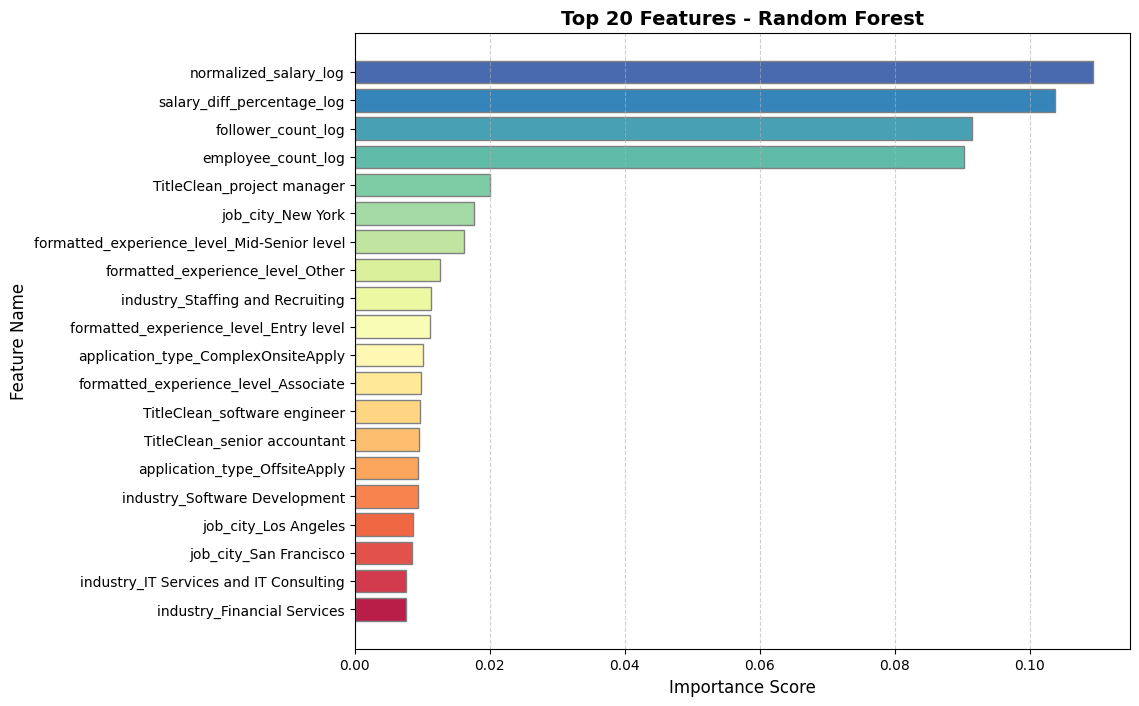

<Figure size 640x480 with 0 Axes>

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Extract feature importance
feature_importance = pd.Series(best_rf.feature_importances_, index=X_train_transformed.columns)

# Sort and select top 20
top_features = feature_importance.sort_values(ascending=False).head(20)

# Create color gradient based on importance values
colors = sns.color_palette("Spectral", len(top_features))

# Plot
plt.figure(figsize=(10, 8))
bars = plt.barh(top_features.index[::-1], top_features.values[::-1], color=colors, edgecolor='grey')

# Styling
plt.title("Top 20 Features - Random Forest", fontsize=14, fontweight='bold')
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature Name", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show plot
plt.show()

plt.savefig("feature_importance.png", dpi=300, bbox_inches='tight', transparent=True)


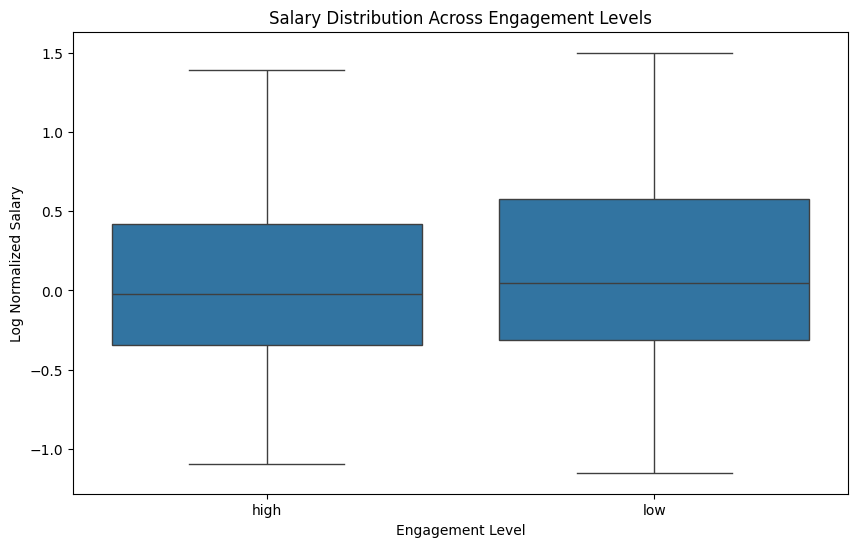

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of salary vs. engagement level
plt.figure(figsize=(10, 6))
sns.boxplot(x=y_test, y=X_test_transformed['normalized_salary_log'])
plt.title("Salary Distribution Across Engagement Levels")
plt.xlabel("Engagement Level")
plt.ylabel("Log Normalized Salary")
plt.show()


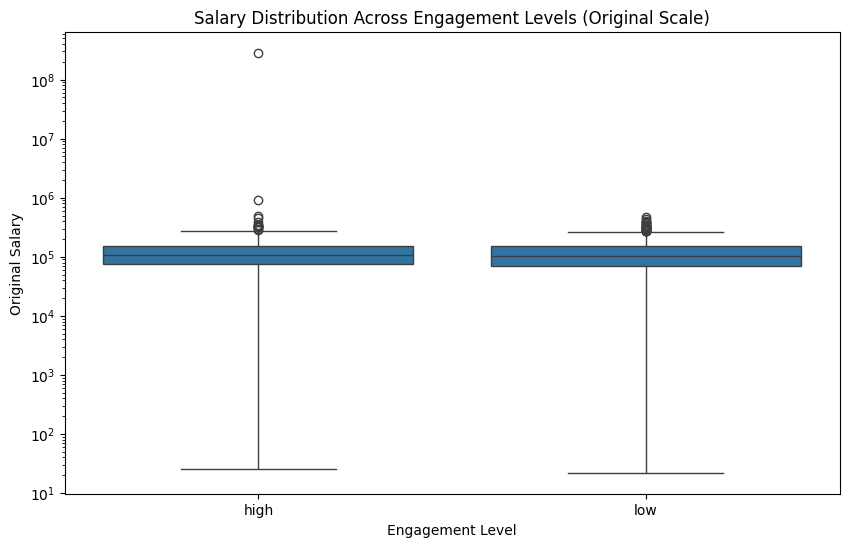

In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reverse log transformation
cleaned_df["normalized_salary_original"] = np.expm1(cleaned_df["normalized_salary_log"])

# Plot salary distribution in original scale
plt.figure(figsize=(10, 6))
sns.boxplot(x=y_test, y=cleaned_df["normalized_salary_original"])
plt.title("Salary Distribution Across Engagement Levels (Original Scale)")
plt.xlabel("Engagement Level")
plt.ylabel("Original Salary")
plt.yscale("log")  # Use log scale to handle large salary differences
plt.show()


C:\Users\melam\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


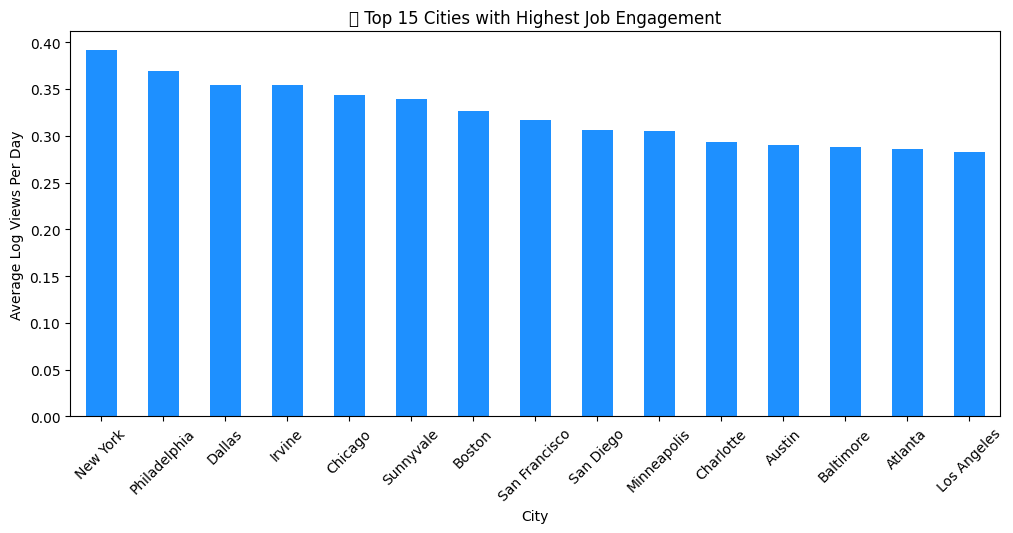

In [27]:
city_engagement = cleaned_df.groupby("job_city")["views_per_day_log"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
city_engagement.head(15).plot(kind="bar", color="dodgerblue")
plt.title("🔥 Top 15 Cities with Highest Job Engagement")
plt.xlabel("City")
plt.ylabel("Average Log Views Per Day")
plt.xticks(rotation=45)
plt.show()


C:\Users\melam\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


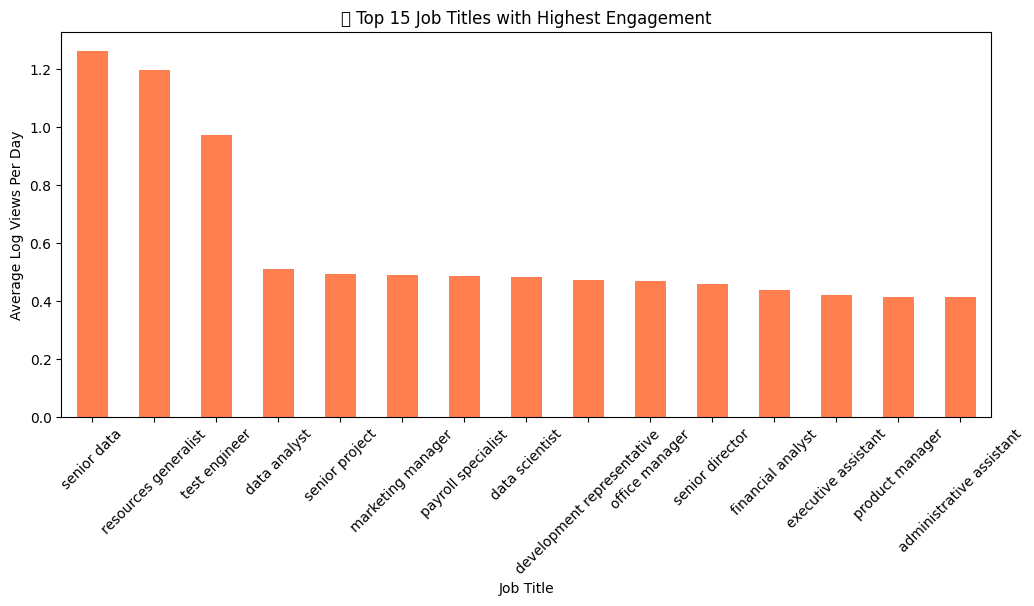

In [28]:
title_engagement = cleaned_df.groupby("TitleClean")["views_per_day_log"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
title_engagement.head(15).plot(kind="bar", color="coral")
plt.title("🔥 Top 15 Job Titles with Highest Engagement")
plt.xlabel("Job Title")
plt.ylabel("Average Log Views Per Day")
plt.xticks(rotation=45)
plt.show()
